# Pandas Groupby() operations

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [12]:
#Grouping data based on gender
gender_avg_age = titanic.groupby('sex').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16164\277405159.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_avg_age = titanic.groupby('sex').mean()


In [11]:
gender_avg_age['age'].to_frame()

,age
sex,
female,27.915709
male,30.726645


In [28]:
#Slicing only 10 rows along with Sex and Age column
titanic_slice = titanic.iloc[:10,2:4]

In [18]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [20]:
x = titanic_slice.groupby('sex')

In [22]:
x

In [23]:
type(x)

pandas.core.groupby.generic.DataFrameGroupBy

In [25]:
#Group by Attributes
x.groups

{'female': [1, 2, 3, 8, 9], 'male': [0, 4, 5, 6, 7]}

In [26]:
lst = list(x)

In [27]:
#List contains two elements 0 is female and 1 is male.
lst

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [30]:
len(lst)

2

In [37]:
#Represents Female records
lst[0]

('female',
       sex   age
 1  female  38.0
 2  female  26.0
 3  female  35.0
 8  female  27.0
 9  female  14.0)

In [38]:
#Represents male records
lst[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [39]:
#List 0 has female and 1 has dataframe
lst[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [35]:
lst[1]

('male',
     sex   age
 0  male  22.0
 4  male  35.0
 5  male   NaN
 6  male  54.0
 7  male   2.0)

In [36]:
lst[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [41]:
titanic_slice_f = titanic_slice.loc[titanic.sex == 'female']

In [42]:
titanic_slice_f

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [43]:
titanic_slice_m = titanic_slice.loc[titanic.sex == 'male']

In [44]:
titanic_slice_m

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [46]:
titanic_slice_f.equals(lst[0][1])

True

In [48]:
titanic_slice_m.equals(lst[1][1])

True

# Splitting with many Keys

In [49]:
import pandas as pd

In [50]:
summer = pd.read_csv('summer.csv')

In [51]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [52]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [53]:
summer['Country'].nunique()

147

In [55]:
#Grouping countries into Groupby object split1
split1 = summer.groupby('Country')

In [56]:
l = list(split1)

In [57]:
l

[('AFG',
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 ('AHO',
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 ('ALG',
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  19874  1992    Barcelona  Athletics  Athletics    BOULMERKA, Hassiba     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine  

In [58]:
len(l)

147

In [63]:
l[100][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5031,1928,Amsterdam,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5741,1932,Los Angeles,Aquatics,Swimming,"YLDEFONSO, Teofilo",PHI,Men,200M Breaststroke,Bronze
5889,1932,Los Angeles,Athletics,Athletics,"TORIBIO, Simeon Galvez",PHI,Men,High Jump,Bronze
5922,1932,Los Angeles,Boxing,Boxing,"VILLANUEVA, Jose",PHI,Men,50.8 - 54KG (Bantamweight),Bronze
6447,1936,Berlin,Athletics,Athletics,"WHITE, Miguel S.",PHI,Men,400M Hurdles,Bronze
11005,1964,Tokyo,Boxing,Boxing,"VILLANUEVA, Anthony N.",PHI,Men,54 - 57KG (Featherweight),Silver
18513,1988,Seoul,Boxing,Boxing,"SERANTES, Leopoldo",PHI,Men,- 48KG (Light-Flyweight),Bronze
20184,1992,Barcelona,Boxing,Boxing,"VELASCO, Roel",PHI,Men,- 48KG (Light-Flyweight),Bronze
21927,1996,Atlanta,Boxing,Boxing,"VELASCO, Mansueto",PHI,Men,- 48KG (Light-Flyweight),Silver


In [65]:
split2 = summer.groupby(by = ['Country','Gender'])

In [67]:
l2 = list(split2)

In [68]:
l2

[(('AFG', 'Men'),
         Year     City      Sport Discipline           Athlete Country Gender  \
  28965  2008  Beijing  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  30929  2012   London  Taekwondo  Taekwondo  NIKPAI, Rohullah     AFG    Men   
  
              Event   Medal  
  28965     - 58 KG  Bronze  
  30929  58 - 68 KG  Bronze  ),
 (('AHO', 'Men'),
         Year   City    Sport Discipline          Athlete Country Gender  \
  19323  1988  Seoul  Sailing    Sailing  BOERSMA, Jan D.     AHO    Men   
  
                       Event   Medal  
  19323  Board (Division Ii)  Silver  ),
 (('ALG', 'Men'),
         Year         City      Sport Discipline               Athlete Country  \
  17060  1984  Los Angeles     Boxing     Boxing        ZAOUI, Mohamed     ALG   
  17064  1984  Los Angeles     Boxing     Boxing      MOUSSA, Mustapha     ALG   
  20200  1992    Barcelona     Boxing     Boxing       SOLTANI, Hocine     ALG   
  21610  1996      Atlanta  Athletics  Athlet

In [75]:
l2[70]

(('FIN', 'Men'),
        Year     City       Sport       Discipline                Athlete  \
 1245   1908   London   Athletics        Athletics       JÄRVINEN, Werner   
 1396   1908   London  Gymnastics      Artistic G.  FORSSTRÖM, Eino Vilho   
 1397   1908   London  Gymnastics      Artistic G.        GRANSTRÖM, Otto   
 1398   1908   London  Gymnastics      Artistic G.   KEMP, Johan Valdemar   
 1399   1908   London  Gymnastics      Artistic G.       KYYKOSKI, Livara   
 ...     ...      ...         ...              ...                    ...   
 26873  2004   Athens    Shooting         Shooting      KEMPPAINEN, Marko   
 27164  2004   Athens   Wrestling  Wrestling Gre-R  YLI-HANNUKSELA, Marko   
 27686  2008  Beijing   Athletics        Athletics        PITKAMAKI, Tero   
 28855  2008  Beijing    Shooting         Shooting        HAKKINEN, Henri   
 29737  2012   London   Athletics        Athletics       RUUSKANEN, Antti   
 
       Country Gender                       Event   Medal

In [77]:
l2[70][0]

('FIN', 'Men')

In [78]:
l2[70][1]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
1245,1908,London,Athletics,Athletics,"JÄRVINEN, Werner",FIN,Men,Discus Throw Ancient Style,Bronze
1396,1908,London,Gymnastics,Artistic G.,"FORSSTRÖM, Eino Vilho",FIN,Men,Team Competition,Bronze
1397,1908,London,Gymnastics,Artistic G.,"GRANSTRÖM, Otto",FIN,Men,Team Competition,Bronze
1398,1908,London,Gymnastics,Artistic G.,"KEMP, Johan Valdemar",FIN,Men,Team Competition,Bronze
1399,1908,London,Gymnastics,Artistic G.,"KYYKOSKI, Livara",FIN,Men,Team Competition,Bronze
...,...,...,...,...,...,...,...,...,...
26873,2004,Athens,Shooting,Shooting,"KEMPPAINEN, Marko",FIN,Men,Skeet (125 Targets),Silver
27164,2004,Athens,Wrestling,Wrestling Gre-R,"YLI-HANNUKSELA, Marko",FIN,Men,66 - 74KG,Silver
27686,2008,Beijing,Athletics,Athletics,"PITKAMAKI, Tero",FIN,Men,Javelin Throw,Bronze
28855,2008,Beijing,Shooting,Shooting,"HAKKINEN, Henri",FIN,Men,10M Air Rifle (60 Shots),Bronze


# Split-apply-combine explained

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic.csv')

In [4]:
titanic_slice = titanic.iloc[:10,[2,3]]

In [5]:
titanic_slice

,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [8]:
list(titanic_slice.groupby('sex'))

[('female',
        sex   age
  1  female  38.0
  2  female  26.0
  3  female  35.0
  8  female  27.0
  9  female  14.0),
 ('male',
      sex   age
  0  male  22.0
  4  male  35.0
  5  male   NaN
  6  male  54.0
  7  male   2.0)]

In [9]:
list(titanic_slice.groupby('sex'))[0][1]

,sex,age
1,female,38.0
2,female,26.0
3,female,35.0
8,female,27.0
9,female,14.0


In [10]:
list(titanic_slice.groupby('sex'))[1][1]

,sex,age
0,male,22.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0


In [11]:
titanic_slice.groupby('sex').mean()

,age
sex,
female,28.00
male,28.25


In [12]:
titanic_slice.groupby('sex').sum()

,age
sex,
female,140.0
male,113.0


In [14]:
titanic_slice.groupby('sex').median()

,age
sex,
female,27.0
male,28.5


In [15]:
titanic.groupby('sex').survived.sum()

sex
female    233
male      109
Name: survived, dtype: int64

In [17]:
titanic.groupby('sex')[['fare','age']].max()

,fare,age
sex,,
female,512.3292,63.0
male,512.3292,80.0


In [24]:
x = titanic.groupby('sex').mean()
x

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\4049411735.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = titanic.groupby('sex').mean()


,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\4062880908.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


array([<Axes: title={'center': 'survived'}, xlabel='sex'>,
       <Axes: title={'center': 'pclass'}, xlabel='sex'>,
       <Axes: title={'center': 'age'}, xlabel='sex'>,
       <Axes: title={'center': 'sibsp'}, xlabel='sex'>,
       <Axes: title={'center': 'parch'}, xlabel='sex'>,
       <Axes: title={'center': 'fare'}, xlabel='sex'>], dtype=object)

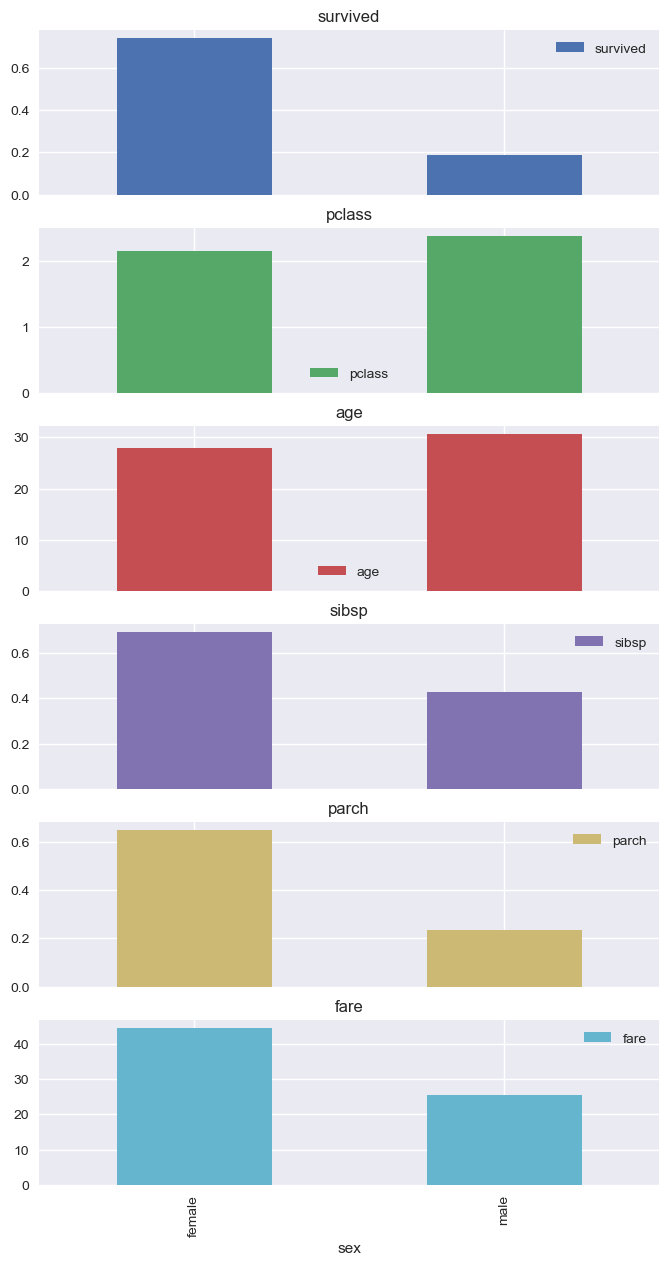

In [28]:
x.plot(kind = 'bar',subplots = True,figsize = (8,15))

In [29]:
import pandas as pd

In [30]:
summer = pd.read_csv('summer.csv')

In [31]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [43]:
#Fetching total medal counts country wise...
medals_per_country = summer.groupby('Country').Medal.count().nlargest(n=30)

In [39]:
pd.options.display.min_rows = 100

In [44]:
medals_per_country

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
GDR     825
CHN     807
JPN     788
RUS     768
CAN     649
ROU     640
NOR     554
KOR     529
POL     511
DEN     507
FRG     490
FIN     456
ESP     442
YUG     435
BRA     431
BEL     411
CUB     410
SUI     380
BUL     333
TCH     329
Name: Medal, dtype: int64

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

C:\Users\Admin\AppData\Local\Temp\ipykernel_5452\4062880908.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


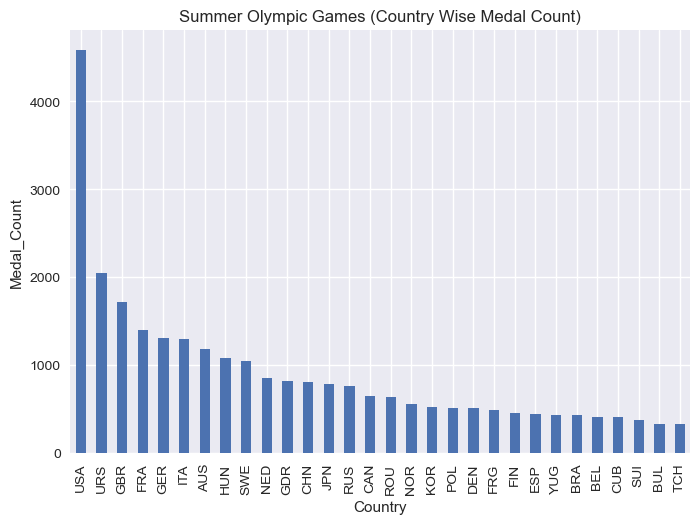

In [50]:
medals_per_country.plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Medal_Count')
plt.title('Summer Olympic Games (Country Wise Medal Count)')
plt.show()